In [45]:
import pandas as pd

In [46]:
df = pd.read_csv('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Final_Project/speeches_bundestag/Final_DF/combined_df.csv')

# Who Spoke Most

In [47]:
df['Fraktion_x'] = df['Fraktion_x'].replace('Bündnis 90/Die Grünen', 'Die Grünen')

In [48]:
df.dropna(subset=['Name'], inplace=True)

In [49]:
df.shape

(4530439, 15)

In [50]:
df.isna().sum()

Unnamed: 0             0
Wahlperiode_x          0
Sitzung                0
Date                   0
Start                  0
Schluss                0
Speaker                0
Text_Spoken            0
Reactions        3815494
Wahlperiode_y          0
Name                   0
Fraktion_x             0
Fraktion_y             0
Position               0
Wahlperiode            0
dtype: int64

In [51]:
print(df['Fraktion_x'].unique())

['SPD' 'PDS' 'CDU' 'FDP' 'Die Grünen' 'CSU' 'AfD' 'Die Linke'
 'fraktionslos' 'LKR' 'SSW']


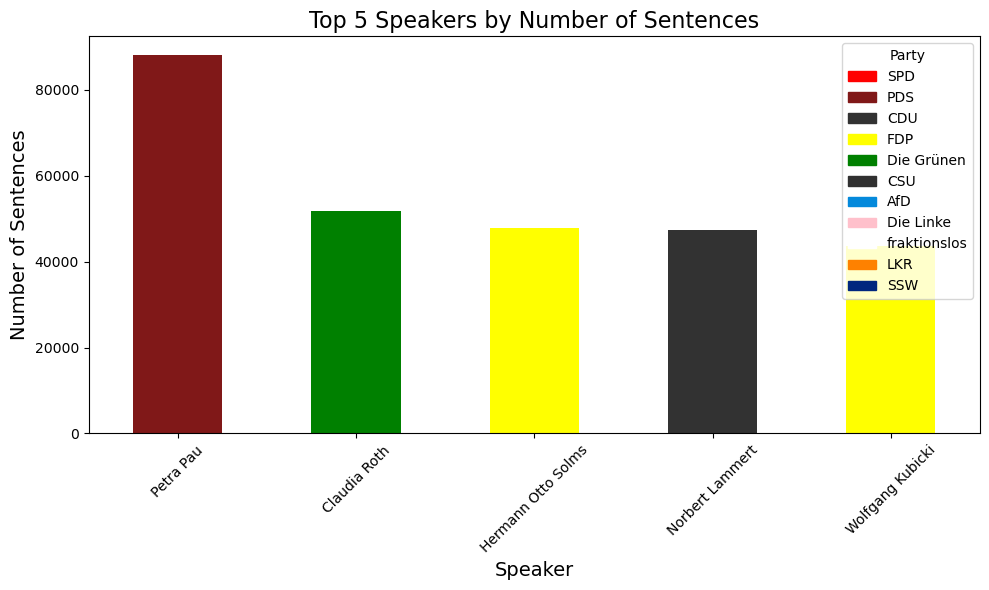

In [53]:
# Color code the party
import pandas as pd
import matplotlib.pyplot as plt

# Since there is no actual dataframe provided, I will create a sample dataframe for demonstration purposes.
# In a real scenario, the user would provide the dataframe or a way to access it.


# Calculating the speaker with the most sentences overall
most_sentences_speaker = df['Name'].value_counts().idxmax()

# Calculating the speaker with the longest sentence
df['sentence_length'] = df['Text_Spoken'].apply(len)
longest_sentence_speaker = df.loc[df['sentence_length'].idxmax(), 'Name']

# Generating a barplot for the top 10 names who spoke the most
speaker_counts = df['Name'].value_counts().head(5)


colors = df.drop_duplicates('Name').set_index('Name')['Fraktion_x'].map({
    'SPD':'red', 'PDS':'#801818', 'CDU':'#323232', 'FDP':'yellow', 'Die Grünen':'green', 'CSU':'#303030', 'AfD':'#0489DB', 'Die Linke':'pink', 'fraktionslos':'white', 'LKR':'#FE8100', 'SSW':'#00277E'
}).reindex(speaker_counts.index)

plt.figure(figsize=(10, 6))

speaker_counts.plot(kind='bar', color=colors)
plt.title('Top 5 Speakers by Number of Sentences', fontsize=16)
plt.xlabel('Speaker', fontsize=14)
plt.ylabel('Number of Sentences', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Adding a legend for the parties
party_colors = {
    'SPD': 'red',
    'PDS': '#801818',
    'CDU': '#323232',
    'FDP': 'yellow',
    'Die Grünen': 'green',
    'CSU': '#303030',
    'AfD': '#0489DB',
    'Die Linke': 'pink',
    'fraktionslos': 'white',
    'LKR': '#FE8100',
    'SSW': '#00277E'
}

patches = [plt.Rectangle((0,0),1,1, color=party_colors[name]) for name in party_colors]
plt.legend(patches, party_colors.keys(), loc='upper right', title='Party')

plt.show();

#(most_sentences_speaker, longest_sentence_speaker, speaker_counts)


In [ ]:
# Count the total number of sentences in the DataFrame
total_sentences = df.shape[0]

total_sentences

In [ ]:
80000/4500000

# Sentences by Party

check how many members in each party. and compare number of speakers vs spoken sentences as speaking time per speaker

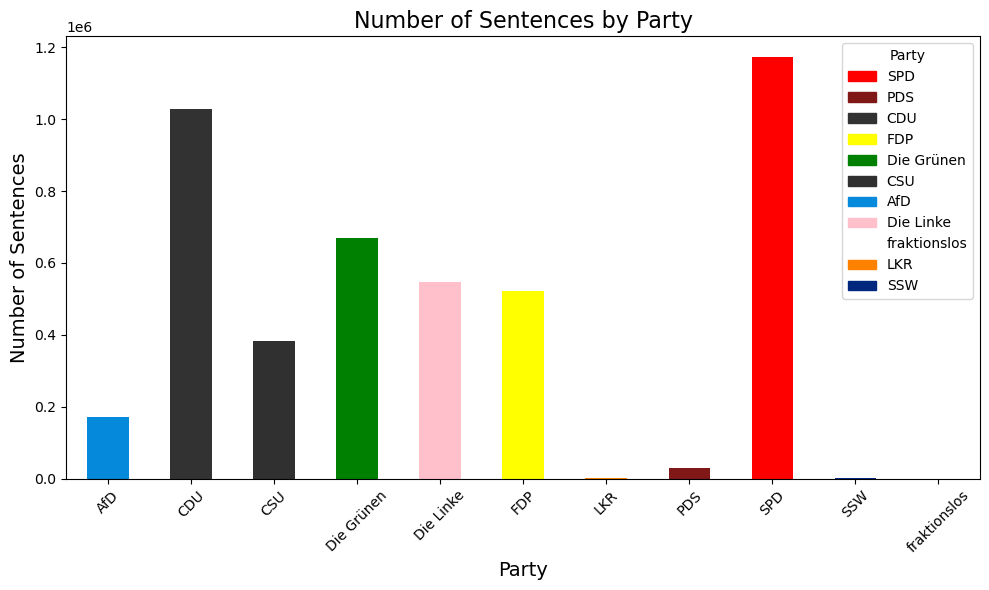

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data creation since the actual dataframe 'df' is not provided.
# This is just to demonstrate the code logic.
# In a real scenario, the dataframe would be provided with the actual data.

# Generating a barplot for the count of sentences spoken by each party
# First, we need to group by the party and then count the number of sentences for each party
party_counts = df.groupby('Fraktion_x')['Text_Spoken'].count()

# Define colors for each party
party_colors_map = {
    'SPD': 'red',
    'PDS': '#801818',
    'CDU': '#323232',
    'FDP': 'yellow',
    'Die Grünen': 'green',
    'CSU': '#303030',
    'AfD': '#0489DB',
    'Die Linke': 'pink',
    'fraktionslos': 'white',
    'LKR': '#FE8100',
    'SSW': '#00277E'
}

# Assign colors to each party in the party_counts Series
colors = party_counts.index.map(party_colors_map)

plt.figure(figsize=(10, 6))

party_counts.plot(kind='bar', color=colors)
plt.title('Number of Sentences by Party', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Number of Sentences', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Adding a legend for the parties
patches = [plt.Rectangle((0,0),1,1, color=party_colors_map[name]) for name in party_colors_map]
plt.legend(patches, party_colors_map.keys(), loc='upper right', title='Party')

plt.show();


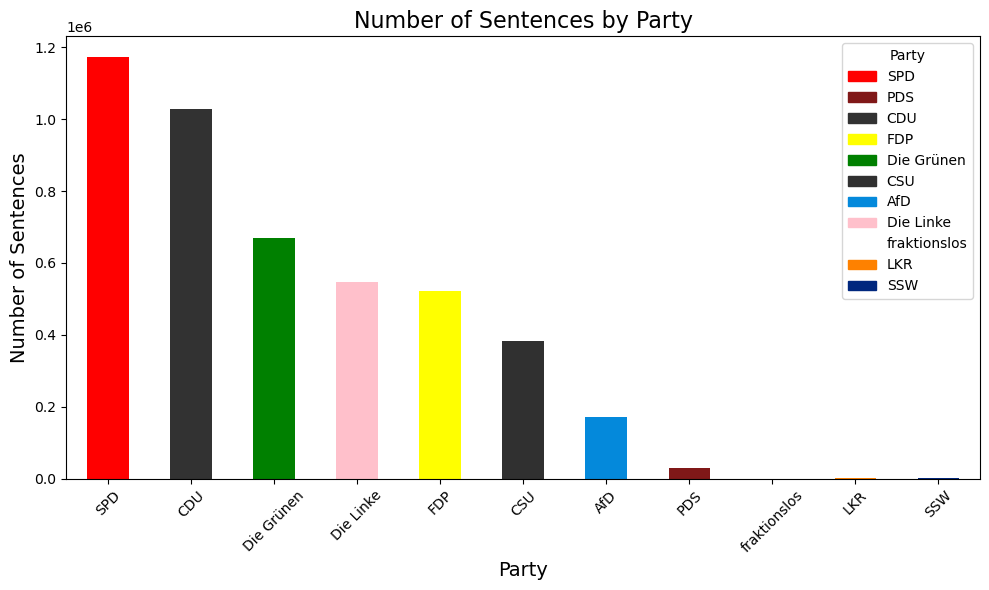

In [60]:
# To order the bars by the number of sentences, we'll sort the party_counts Series in descending order
sorted_party_counts = party_counts.sort_values(ascending=False)

# Re-assign colors to each party in the sorted series
sorted_colors = sorted_party_counts.index.map(party_colors_map)

plt.figure(figsize=(10, 6))

# Create the bar plot with the sorted data
sorted_party_counts.plot(kind='bar', color=sorted_colors)
plt.title('Number of Sentences by Party', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Number of Sentences', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Add the legend for the parties
patches = [plt.Rectangle((0,0),1,1, color=party_colors_map[name]) for name in party_colors_map]
plt.legend(patches, party_colors_map.keys(), loc='upper right', title='Party')
plt.savefig('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Final_Project/Präsentation/Graphs/number_sentence_party.png', bbox_inches='tight')
plt.show();

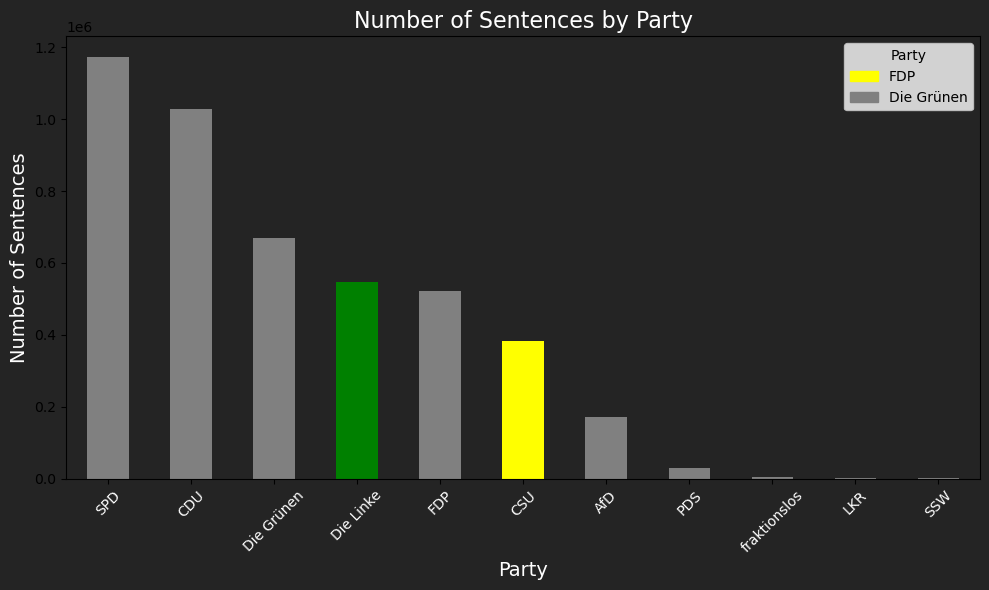

In [74]:
# FDP bright, rest grey
import matplotlib.pyplot as plt

# Assuming 'party_colors_map' is a dictionary that maps parties to their respective colors
highlight_color = party_colors_map['FDP']  # Replace 'FDP' with the actual key if different
default_color = 'grey'  # Color for non-highlighted bars
background_color = '#242424'  # Dark grey background color

# Set the highlight color for FDP and grey for others
sorted_colors = sorted_party_counts.index.map(lambda x: highlight_color if x == 'FDP' or x == 'Die Grünen' else default_color)
sorted_colors= ['yellow' if party == 'FDP' else 'green' if party == 'Die Grünen' else 'gray' for party in party_counts.index]
plt.figure(figsize=(10, 6),facecolor=background_color)

# Create the bar plot with the sorted data
ax = sorted_party_counts.plot(kind='bar', color=sorted_colors)
plt.title('Number of Sentences by Party', fontsize=16, color='white')
plt.xlabel('Party', fontsize=14, color='white')
plt.ylabel('Number of Sentences', fontsize=14, color='white')
plt.xticks(rotation=45, color='white')
plt.tight_layout()

ax.set_facecolor(background_color)

# Add the legend for the FDP
patches = [plt.Rectangle((0,0),1,1, color=highlight_color), plt.Rectangle((0,0),1,1, color=default_color)]
plt.legend(patches, ['FDP', 'Die Grünen', 'Other Parties'], loc='upper right', title='Party')

# Save the figure
plt.savefig('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Final_Project/Präsentation/Graphs/number_sentence_party_fdp.png', bbox_inches='tight')
plt.show();

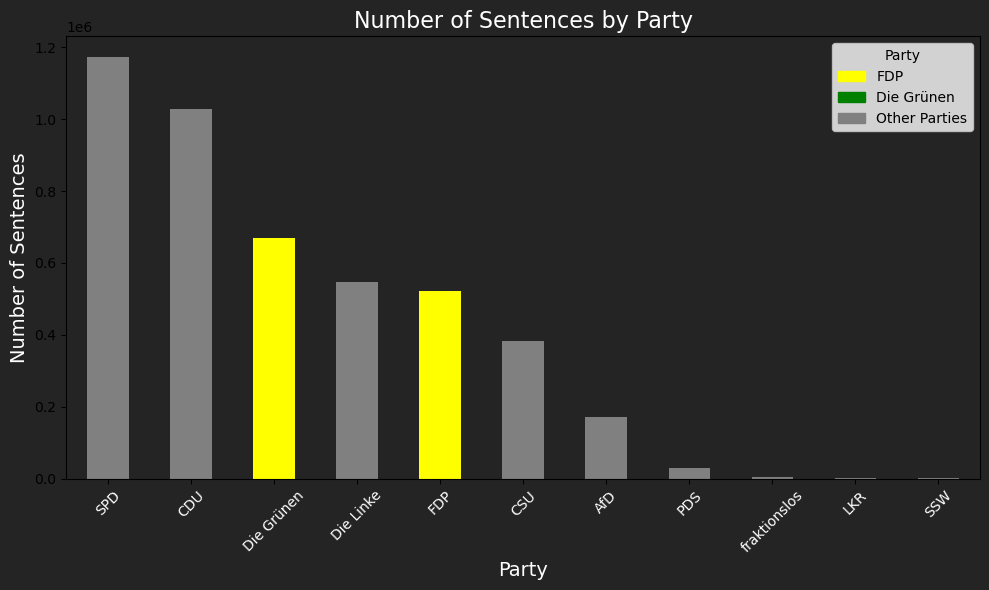

In [78]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assuming 'party_colors_map' is a dictionary that maps parties to their respective colors
highlight_color = party_colors_map['FDP']  # Replace 'FDP' with the actual key if different
default_color = 'grey'  # Color for non-highlighted bars
background_color = '#242424'  # Dark grey background color

# Set the highlight color for FDP and grey for others
sorted_colors = sorted_party_counts.index.map(lambda x: highlight_color if x == 'FDP' or x=='Die Grünen' else default_color)
#sorted_colors = ['yellow' if party == 'FDP' else 'green' if party == 'Die Grünen' else 'gray' for party in party_counts.index]

plt.figure(figsize=(10, 6), facecolor=background_color)

# Create the bar plot with the sorted data
ax = sorted_party_counts.plot(kind='bar', color=sorted_colors)
plt.title('Number of Sentences by Party', fontsize=16, color='white')
plt.xlabel('Party', fontsize=14, color='white')
plt.ylabel('Number of Sentences', fontsize=14, color='white')
plt.xticks(rotation=45, color='white')
plt.tight_layout()

ax.set_facecolor(background_color)

# Add the legend for the FDP and Die Grünen
patches = [plt.Rectangle((0, 0), 1, 1, color=highlight_color),
          plt.Rectangle((0, 0), 1, 1, color='green'),
          plt.Rectangle((0, 0), 1, 1, color=default_color)]
plt.legend(patches, ['FDP', 'Die Grünen', 'Other Parties'], loc='upper right', title='Party')

# Save the figure
plt.savefig('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Final_Project/Präsentation/Graphs/number_sentence_party_fdp.png', bbox_inches='tight')
plt.show();

# Number of Party Members

In [88]:
# Define colors for each party
party_colors_map = {
    'SPD': 'grey',
    'PDS': 'grey',
    'CDU': 'grey',
    'FDP': 'yellow',
    'Die Grünen': 'green',
    'CSU': 'grey',
    'AfD': 'grey',
    'Die Linke': 'grey',
    'fraktionslos': 'grey',
    'LKR': 'grey',
    'SSW': 'grey'
}

<Figure size 1000x600 with 0 Axes>

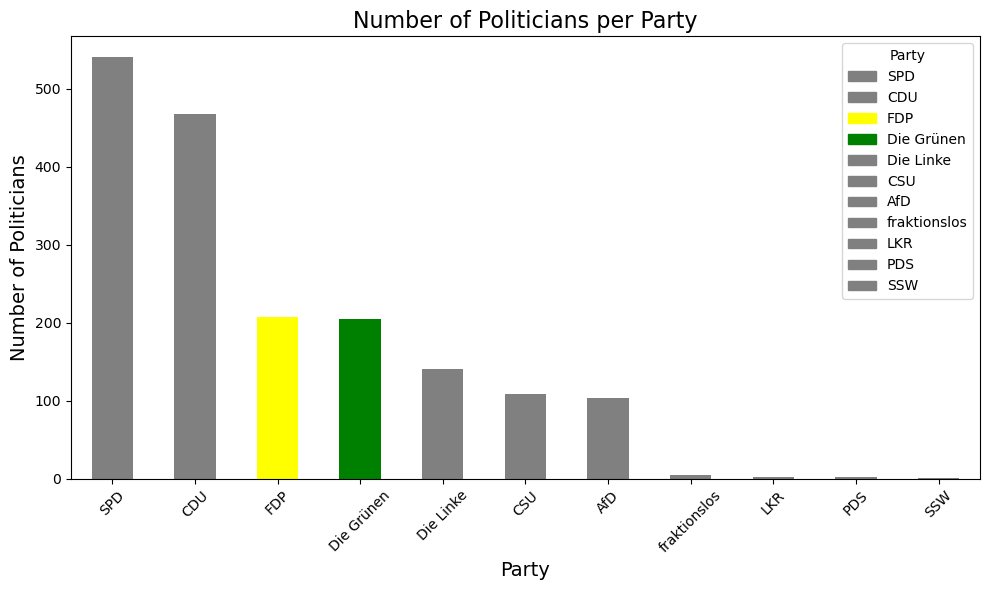

In [95]:
# Counting the number of unique names (speakers) per party
names_per_party = df.groupby('Fraktion_x')['Name'].nunique().sort_values(ascending=False)
#names_per_party = df.groupby('Fraktion_x')['Text_Spoken'].count().sort_values(ascending=False)

# Assign colors to each party in the sorted counts
colors = names_per_party.index.map(lambda x: party_colors_map.get(x, 'grey'))  # Default to 'grey' if party not found in map
#colors= ['yellow' if party == 'FDP' else 'green' if party == 'Die Grünen' else 'gray' for party in party_counts.index]
#colors = sorted_party_counts.index.map(lambda x: highlight_color if x == 'FDP' or x=='Die Grünen' else default_color)
plt.figure(figsize=(10, 6),facecolor=background_color)
plt.figure(figsize=(10, 6))

# Create the bar plot with the sorted data
names_per_party.plot(kind='bar', color=colors)
plt.title('Number of Politicians per Party', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Number of Politicians', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Update the legend for the parties
patches = [plt.Rectangle((0,0),1,1, color=party_colors_map.get(name, 'grey')) for name in names_per_party.index]
plt.legend(patches, names_per_party.index, loc='upper right', title='Party')
plt.savefig('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Final_Project/Präsentation/Graphs/number_speakers_sentences.png', bbox_inches='tight')
plt.show();


In [ ]:
# fdp


# Longest sentence

In [34]:
# Calculate the length of each sentence
df['sentence_length'] = df['Text_Spoken'].str.len()

# Find the longest sentence and its speaker
longest_sentence_row = df.loc[df['sentence_length'].idxmax()]

# Print the results
speaker_of_longest_sentence = longest_sentence_row['Name']
longest_sentence = longest_sentence_row['Text_Spoken']

print(f"The speaker of the longest sentence is: {speaker_of_longest_sentence}")
print(f"The longest sentence is: '{longest_sentence}'")

The speaker of the longest sentence is: Norbert Lammert
The longest sentence is: 'zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Klaus Ernst, weiterer Abgeordneter und der Fraktion DIE LINKEK orrektur der Überleitung von DDR Alterssicherungen in bundesdeutsches Recht zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Dr Dietmar Bartsch,weiterer Abgeordneter und der Fraktion DIELINKEG erechte Alterseinkünfte für Beschäftigteim Gesundheits und Sozialwesen der DDR zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Dr Dietmar Bartsch,weiterer Abgeordneter und der Fraktion DIELINKEG erechte Lösung für rentenrechtliche Situation von in der DDR Geschiedenen zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Dr Dietmar Bartsch,weiterer Abgeordneter und der Fraktion DIELINKEG erechte Versorgungslösung für Ballettmitglieder in der DDR zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Dr Dietmar Bartsch,weiterer Abgeordnet

In [35]:
# Calculate the length of each sentence by word count
df['word_count'] = df['Text_Spoken'].apply(lambda s: len(s.split()))

# Find the index of the row with the longest sentence by word count
index_of_longest_sentence_by_word_count = df['word_count'].idxmax()

# Retrieve the number of words in the longest sentence
num_words_in_longest_sentence = df.loc[index_of_longest_sentence_by_word_count, 'word_count']

num_words_in_longest_sentence

659

# Most Reactions